#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
import wandb
wandb.init(project="face_clustering_lab5")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: lipisinghal31 (lipisinghal31-plaksha-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [16]:
## Reading the image plaksha_Faculty.jpg
image = cv2.imread("images/Plaksha_Faculty.jpg")
wandb.log({"input image": wandb.Image(image)})

## Convert the image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Faces" ## The text you want to write
font = cv2.FONT_HERSHEY_DUPLEX ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(image, text, (x, y - 10), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of faces detected: {len(faces_rect)}", image)
cv2.imwrite("detected faces.jpg", image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [4]:
wandb.log({"Detected Faces": wandb.Image(image)})

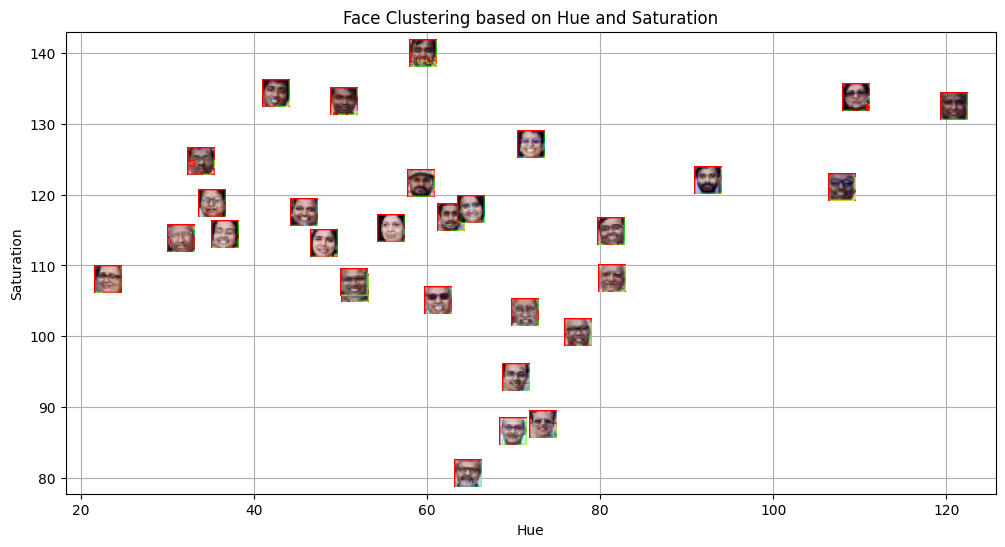

In [5]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Hue and Saturation")
plt.savefig("clustered_faces.png")
plt.grid(True)
plt.show()


In [6]:
wandb.log({"Clustered Faces": wandb.Image("clustered_faces.png")})  

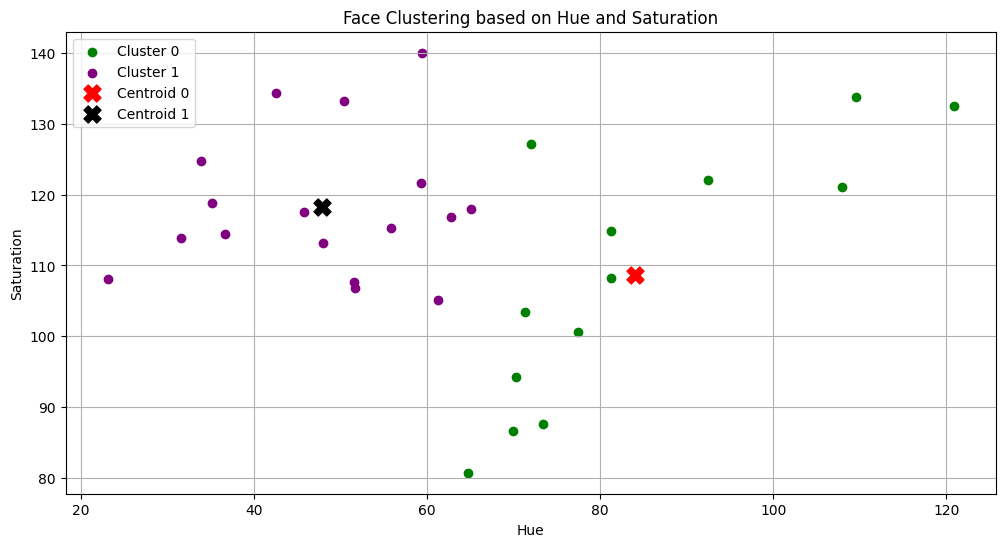

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label="Cluster 0")


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='purple', label="Cluster 1")

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=150, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=150, label="Centroid 1")

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Hue and Saturation")
plt.savefig('scatter plot face clustering.png')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
wandb.log({"Scatter Plot of Clustered faces": wandb.Image("scatter plot face clustering.png")})  

In [9]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
temp_img = cv2.imread("images/Dr_Shashi_Tharoor.jpg")
wandb.log({"template image": wandb.Image(temp_img)})

gray_temp = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(gray_temp, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(temp_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Face detected in template image", temp_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()      

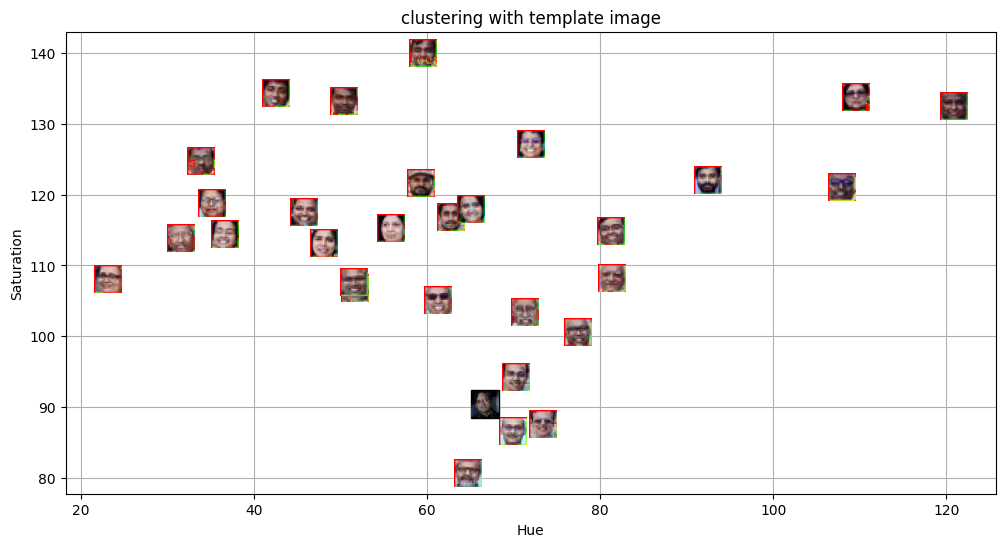

In [10]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(temp_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(temp_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=True, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("clustering with template image")
plt.savefig('Clustering with template image.png')
plt.grid(True)
plt.show()

In [11]:
wandb.log({"Clustering with template image": wandb.Image("Clustering with template image.png")}) 

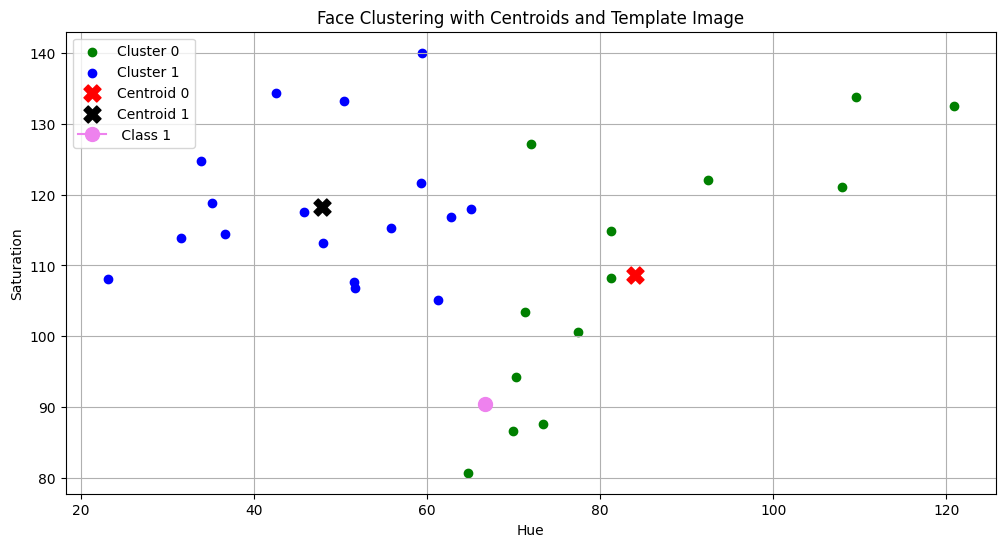

In [12]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label="Cluster 0")

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label="Cluster 1")

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=150, label="Centroid 0") ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='black', marker='X', s=150, label="Centroid 1")  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class 1' )

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering with Centroids and Template Image")
plt.savefig('Scatter plot clustering with template image.png')
plt.legend()
plt.grid(True)
plt.show()
                                            ## End of the lab 5 ##

In [14]:
wandb.log({"Scatter Plot for clustering with template image": wandb.Image("Scatter plot clustering with template image.png")}) 

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Some common distance metrics used in ditance-based classification algorithms are:
- Euclidean distance : it is the ordinary/shortest distance between two points.
- Manhattan distance : it is the absolute differenc between two coordinates.
- Minkowski distance : it is a generalization of Euclidean and Manhattan distance.
- Mahalanobis distance : it is a distance metric that takes into account the covariance of the features.
- Cosine similarity : it is a measure of similarity between two non-zero vectors of an inner product.
- Chebychev distance
- Hamming distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
Sowe real-world applications of distance-based algorithms are:
- Face detection as we did above.
- Document classification - can categorise documents based on their keywords.
- Spam detection - can categorise into spam/not-spam.
- Recommendation systems - can recommend products based on user preferences.
- Object detection - can detect objects in images/videos.

#### 3. Explain various distance metrics.
1. Euclidean distance : 
- It represnts the shortest distance between two vectors.
- It is calculated as the square root of the sum of squares of the difference between yi and xi.
- However, it does not account for the distribution of the data.

2. Mahalanobis distance :
- Basically measures how many standard deviations away a particular point is from the mean of the distribution.
- It takes variance into account.
- Can also be used to detect outliers.
- It is unitless, and takes correlation into account.

3. Manhattan distance : 
- It is the distance along the axes measured at a right angle.
- Works well in high dimensional spaces because of sparcity.

4. Chebychev distance :
- It is defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension.
- It is the maximum distance out of the x an y distance.

#### 4. What is the role of cross validation in model performance? 
Cross validation is used to determine the accuracy of the data. It is also used to prevent overfitting which affects the performance of the model. It is used in testing how well our model might work on unseen data.
We can caluclate the performance metrics such as accuracy, precision, recall, F1 score, etc during cross validation to evaluate the performace of the model.

#### 5. Explain variance and bias in terms of KNN? 
In KNN (k Nearest neighbors) bias and variance are:
- Bias: It is when the model makes consistent mistakes. It can cause model underfitting due too assumptions in the learning algorithm. 
- Variance: It is when the model makes different predictions for the same input. It reflects model's sensitivity to small changes in training data leading to instability and overfitting.